# Diminos Store - Delivery Time


In [1]:
import pandas as pd 

# Import the data

In [2]:
df = pd.read_csv('diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


# Data processing

In [4]:
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [5]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [7]:
df['time_taken_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60
df['time_taken_min'] = df['time_taken_min'].round(0).astype(int)

In [8]:
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,16
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,39
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   time_taken_min      15000 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 468.9 KB


In [10]:
df['time_taken_min'].describe()

count    15000.000000
mean        20.456400
std         96.161896
min         15.000000
25%         15.000000
50%         16.000000
75%         17.000000
max       7300.000000
Name: time_taken_min, dtype: float64

In [11]:
df['time_taken_min'].quantile(0.95)

np.float64(27.0)

In [12]:
df[df['time_taken_min'] > 120].shape

(69, 4)

In [14]:
df['sla_met'] = df['time_taken_min'] <= 31
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_min,sla_met
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17,True
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,16,True
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15,True
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,39,False
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16,True


In [16]:
df['is_outlier'] = df['time_taken_min'] > 120
df.head()

,order_id,order_placed_at,order_delivered_at,time_taken_min,sla_met,is_outlier
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17,True,False
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,16,True,False
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15,True,False
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,39,False,False
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16,True,False


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='time_taken_min'>

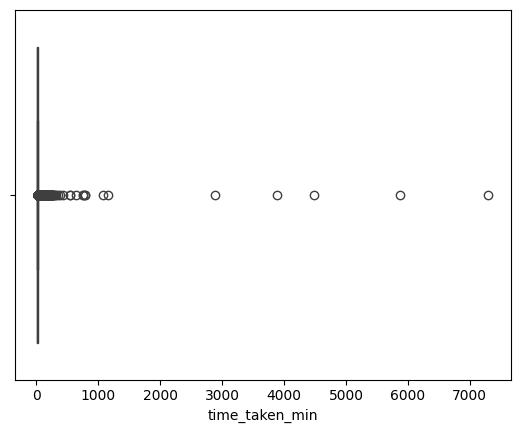

In [21]:
sns.boxplot(x=df['time_taken_min'])


<Axes: xlabel='sla_met', ylabel='count'>

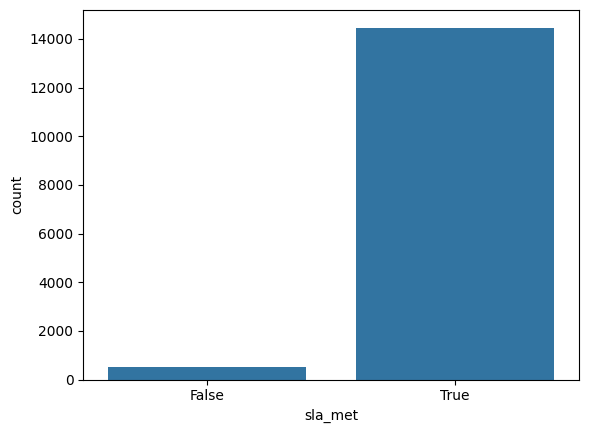

In [22]:
sns.countplot(x=df['sla_met'])


# Insights

## From a business and operations perspective, these findings translate into clear, actionable value:

Customer Trust & Retention: With 95% of orders delivered well within the 31-minute promise, customers experience reliable service, which directly supports repeat usage and brand trust.

Operational Efficiency: The tight clustering of P50–P75 delivery times (15–17 minutes) indicates efficient resource allocation (riders, routing, and order processing) for the majority of demand.

Risk Identification: The presence of a very small set of extreme delays highlights where targeted interventions can yield outsized returns—fixing <1% of problematic cases can significantly improve perceived reliability without large system-wide changes.

Cost Optimization: By focusing improvement efforts on the slowest tail instead of accelerating already-fast deliveries, the business avoids unnecessary operational costs while maximizing SLA stability.

Scalability & Readiness: Maintaining a healthy buffer between actual P95 (27 mins) and SLA (31 mins) provides resilience during demand spikes (festivals, weather, peak hours), reducing the risk of SLA breaches and associated penalties.